In [6]:
%run source.py

In [7]:
''' Inverse CDF for S_v '''
def ICDF(α,v,s):
    return v * (1-s)**(-1/α)

''' Rejection sampling method for sampling the S_v,q random variables '''
def RSM():
    while True:
        s = ICDF(α, v, np.random.uniform(0, 1, size=1))[0]
        u = np.random.uniform(0, 1, size=1)
        if u < np.exp(-q*s):
            return s

''' Auxiliary functions '''
def B(x):
    return ( (t[i]-t[i-1])/x )**α
def B_(x):
    return ( (t[i]-t[i-1]+v-s)/x )**α

def BB(x):
    return ( (t[i]-t[i-1]-W[1,i-1])/x )**α

Example of Algorithm 1

In [8]:
''' Inputs '''
# Time
t0 = 0
tf = 2.5
iterations = 10**3
t = np.linspace(t0, tf, num = int( tf * iterations + 1 ))

# Tempered α-stable subordinator's constants
α = 0.75
θ = 1
q = 1

# Initial values for A, γ, and Γ 
x0 = 0
v0 = 0
r0 = 0

In [21]:
''' α-Stable case '''
V = np.zeros((2,len(t)))
V[0,0] = x0
V[1,0] = v0

for i in range(1,len(t)):
    if V[1,i-1] == 0:
        Triplet = rand_crossing_stable(α, θ, lambda x: t[i]-t[i-1], lambda x: 0, B)
        V[0,i] = V[0,i-1] + Triplet[0]
        V[1,i] = t[i]-t[i-1] - Triplet[1]
    else:
        v = V[1,i-1]
        s = ICDF(α, v, np.random.uniform(0, 1, size=1))[0]
        if s >= v+t[i]-t[i-1]:
            V[0,i] = V[0,i-1]
            V[1,i] = v +t[i]-t[i-1]
        else:
            Triplet = rand_crossing_stable(α, θ, lambda x: t[i]-t[i-1]+v-s, lambda x: 0, B_)
            V[0,i] = V[0,i-1] + Triplet[0]
            V[1,i] = t[i]-t[i-1]+v-s - Triplet[1]

In [13]:
''' Tempered α-Stable case '''
Vq = np.zeros((2,len(t)))
Vq[0,0] = x0
Vq[1,0] = v0

for i in range(1,len(t)):
    if Vq[1,i-1] == 0:
        Triplet = rand_crossing_tempered_stable(α, θ, q, t[i]-t[i-1], 0, B(rand_stable(α,θ,1)))
        Vq[0,i] = Vq[0,i-1] + Triplet[0]
        Vq[1,i] = t[i]-t[i-1] - Triplet[1]
    else:
        v = Vq[1,i-1]
        s = [RSM() for j in range(1)][0]
        if s >= v+t[i]-t[i-1]:
            Vq[0,i] = Vq[0,i-1]
            Vq[1,i] = v +t[i]-t[i-1]
        else:
            Triplet = rand_crossing_tempered_stable(α, θ, q, t[i]-t[i-1]+v-s, 0, B_(rand_stable(α,θ,1)))
            Vq[0,i] = Vq[0,i-1] + Triplet[0]
            Vq[1,i] = t[i]-t[i-1]+v-s - Triplet[1]

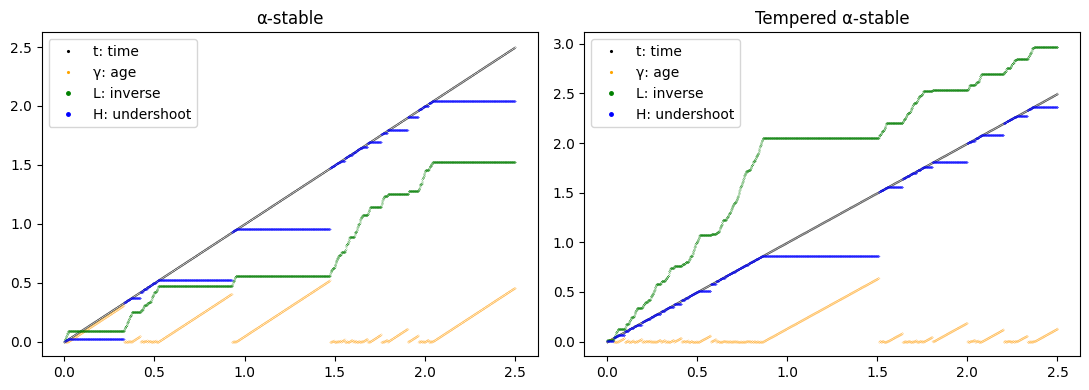

In [22]:
''' Firgure (A) '''
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

ax[0].plot(t, t, linewidth=0, marker='.', markersize=0.1, color='black', label='t: time')
ax[0].plot(t, V[1,:], linewidth=0, marker='.', markersize=0.1, color='orange', label='γ: age')
ax[0].plot(t, V[0,:], linewidth=0, marker='.', markersize=0.2, color='green', label='L: inverse')
ax[0].plot(t, t - V[1,:], linewidth=0, marker='.', markersize=0.2, color='blue', label='H: undershoot')
ax[0].set_title('α-stable')
ax[0].legend(markerscale=25)

ax[1].plot(t, t, linewidth=0, marker='.', markersize=0.1, color='black', label='t: time')
ax[1].plot(t, Vq[1,:], linewidth=0, marker='.', markersize=0.1, color='orange', label='γ: age')
ax[1].plot(t, Vq[0,:], linewidth=0, marker='.', markersize=0.2, color='green', label='L: inverse')
ax[1].plot(t, t - Vq[1,:], linewidth=0, marker='.', markersize=0.2, color='blue', label='H: undershoot')
ax[1].set_title('Tempered α-stable')
ax[1].legend(markerscale=25)

fig.tight_layout()
#plt.savefig('PathsUndershoot.png', dpi=600)

Example of Algorithm 2

In [29]:
''' α-Stable case '''
W = np.zeros((2,len(t)))
W[0,0] = x0
W[1,0] = r0

for i in range(1,len(t)):
    if W[1,i-1] > t[i]-t[i-1]:
        W[0,i] = W[0,i-1]
        W[1,i] = W[1,i-1] - (t[i]-t[i-1])
    else:
        Triplet = rand_crossing_stable(α, θ, lambda x: t[i]-t[i-1]-W[1,i-1], lambda x: 0, BB)
        W[0,i] = W[0,i-1] + Triplet[0]
        W[1,i] = Triplet[1] + Triplet[2]

In [ ]:
''' Tempered α-Stable case '''
Wq = np.zeros((2,len(t)))
Wq[0,0] = x0
Wq[1,0] = r0

for i in range(1,len(t)):
    if Wq[1,i-1] > t[i]-t[i-1]:
        Wq[0,i] = Wq[0,i-1]
        Wq[1,i] = Wq[1,i-1] - (t[i]-t[i-1])
    else:
        Triplet = rand_crossing_tempered_stable(α, θ, q, t[i]-t[i-1]-Wq[1,i-1], 0, BB(rand_stable(α,θ,1)))
        Wq[0,i] = Wq[0,i-1] + Triplet[0]
        Wq[1,i] = Triplet[1] + Triplet[2]

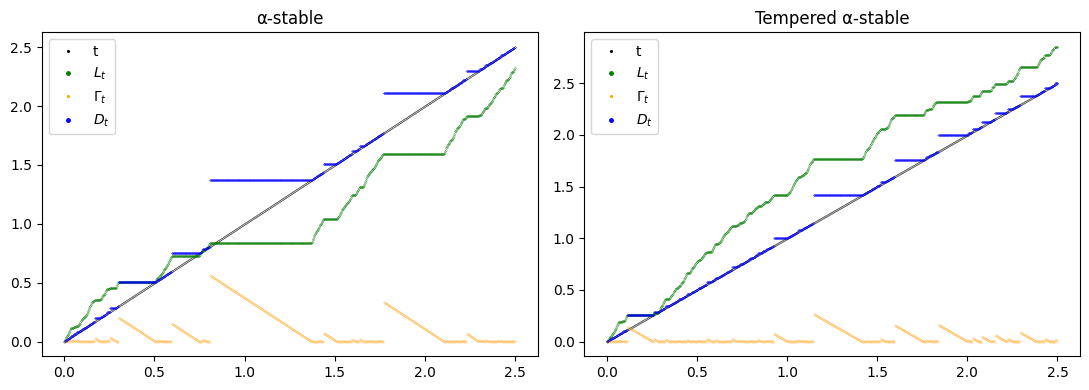

In [51]:
''' Firgure (B) '''
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

ax[0].plot(t, t, linewidth=0, marker='.', markersize=0.1, color='black', label='t')
ax[0].plot(t, W[0,:], linewidth=0, marker='.', markersize=0.2, color='green', label='$L_{t}$')
ax[0].plot(t, W[1,:], linewidth=0, marker='.', markersize=0.1, color='orange', label='$Γ_{t}$')
ax[0].plot(t, W[1,:]+t, linewidth=0, marker='.', markersize=0.2, color='blue', label='$D_{t}$')
ax[0].set_title('α-stable')
ax[0].legend(markerscale=25)

ax[1].plot(t, t, linewidth=0, marker='.', markersize=0.1, color='black', label='t')
ax[1].plot(t, Wq[0,:], linewidth=0, marker='.', markersize=0.2, color='green', label='$L_{t}$')
ax[1].plot(t, Wq[1,:], linewidth=0, marker='.', markersize=0.1, color='orange', label='$Γ_{t}$')
ax[1].plot(t, Wq[1,:]+t, linewidth=0, marker='.', markersize=0.2, color='blue', label='$D_{t}$')
ax[1].set_title('Tempered α-stable')
ax[1].legend(markerscale=25)

fig.tight_layout()
#plt.savefig('Paths.png', dpi=600)

In [76]:
L = Vq[0,:]
H = t-Vq[1,:]
D = t+Wq[1,:]

T = np.concatenate((t,L,H,D))
Tsorted = np.sort(T)

BM = np.zeros(len(Tsorted))
BM[0] = 0
for i in range(len(BM)-1):
    BM[i+1] = BM[i] + np.sqrt( max(Tsorted[i+1]-Tsorted[i], 0) )*np.random.normal(0,1)

BM_ = np.zeros((3,len(t)))
BM_[:,0] = 0
for i in range(1,len(t)):
    j = list(Tsorted).index(L[i])
    k = list(Tsorted).index(H[i])
    l = list(Tsorted).index(D[i])
    BM_[0,i] = BM[j]
    BM_[1,i] = BM[k]
    BM_[2,i] = BM[l]

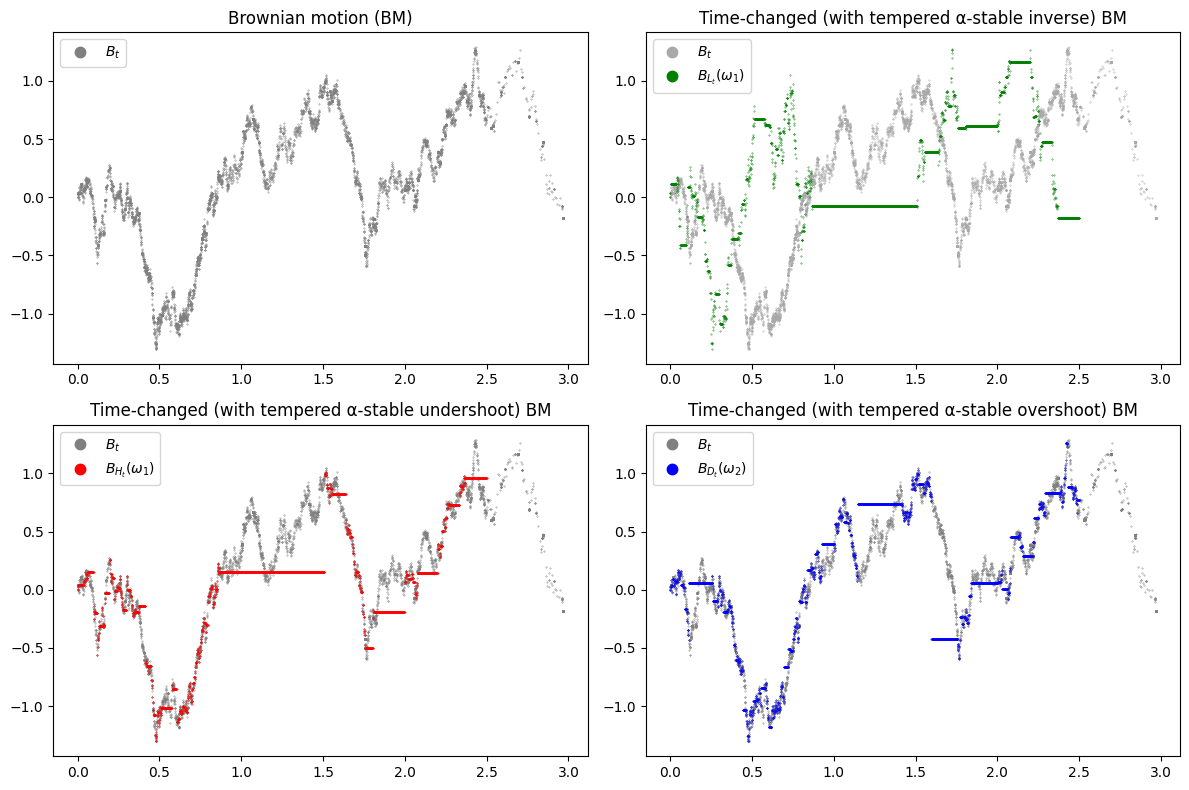

In [77]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0,0].plot(Tsorted, BM, linewidth=0, marker='.', markersize=0.6, color='gray', label='$B_t$')
ax[0,0].set_title('Brownian motion (BM)')
ax[0,0].legend(markerscale=25)

ax[0,1].plot(Tsorted, BM, linewidth=0, marker='.', markersize=0.6, color='darkgray', label='$B_t$')
ax[0,1].plot(t, BM_[0,:], linewidth=0, marker='.', markersize=0.6, color='green', label='$B_{L_t}(ω_1)$')
ax[0,1].set_title('Time-changed (with tempered α-stable inverse) BM')
ax[0,1].legend(markerscale=25)

ax[1,0].plot(Tsorted, BM, linewidth=0, marker='.', markersize=0.6, color='gray', label='$B_t$')
ax[1,0].plot(t, BM_[1,:], linewidth=0, marker='.', markersize=0.6, color='red', label='$B_{H_t}(ω_1)$')
ax[1,0].set_title('Time-changed (with tempered α-stable undershoot) BM')
ax[1,0].legend(markerscale=25)

ax[1,1].plot(Tsorted, BM, linewidth=0, marker='.', markersize=0.6, color='gray', label='$B_t$')
ax[1,1].plot(t, BM_[2,:], linewidth=0, marker='.', markersize=0.6, color='blue', label='$B_{D_t}(ω_2)$')
ax[1,1].set_title('Time-changed (with tempered α-stable overshoot) BM')
ax[1,1].legend(markerscale=25)

fig.tight_layout()
#plt.savefig('TimeChangedBrownianMotion.png', dpi=600)